In [144]:


from statsmodels.tsa.seasonal import seasonal_decompose


In [169]:
# @title bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
color_pal = sns.color_palette("Paired", 10)

color_pal

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509)]

O dataset

In [171]:
df = pd.read_csv('dataset/superstore.csv')

df


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# limpeza do dataset

In [172]:
colunas_remover = ['Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'State', 'Postal Code', 'Region', 'Product ID']

df = df.drop(colunas_remover, axis=1)

In [173]:
df

,Row ID,Order Date,Customer Name,Segment,Country,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,11/8/2016,Claire Gute,Consumer,United States,Henderson,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,11/8/2016,Claire Gute,Consumer,United States,Henderson,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,6/12/2016,Darrin Van Huff,Corporate,United States,Los Angeles,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,10/11/2015,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,10/11/2015,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,1/21/2014,Tom Boeckenhauer,Consumer,United States,Miami,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,2/26/2017,Dave Brooks,Consumer,United States,Costa Mesa,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,2/26/2017,Dave Brooks,Consumer,United States,Costa Mesa,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,2/26/2017,Dave Brooks,Consumer,United States,Costa Mesa,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [174]:
pais_q = df['Country'].value_counts()
pais_q

Country
United States    9994
Name: count, dtype: int64

In [175]:
#todas as vendas são feitas no EUA
colunas_remover = ['Country']

df = df.drop(colunas_remover, axis=1)

df

,Row ID,Order Date,Customer Name,Segment,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,11/8/2016,Claire Gute,Consumer,Henderson,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,11/8/2016,Claire Gute,Consumer,Henderson,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,6/12/2016,Darrin Van Huff,Corporate,Los Angeles,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,10/11/2015,Sean O'Donnell,Consumer,Fort Lauderdale,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,10/11/2015,Sean O'Donnell,Consumer,Fort Lauderdale,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,1/21/2014,Tom Boeckenhauer,Consumer,Miami,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,2/26/2017,Dave Brooks,Consumer,Costa Mesa,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,2/26/2017,Dave Brooks,Consumer,Costa Mesa,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,2/26/2017,Dave Brooks,Consumer,Costa Mesa,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [176]:
product_str = df['Product Name'].value_counts()

product_str

Product Name
Staple envelope                                                            48
Staples                                                                    46
Easy-staple paper                                                          46
Avery Non-Stick Binders                                                    20
Staples in misc. colors                                                    19
                                                                           ..
Xiaomi Mi3                                                                  1
Sanitaire Vibra Groomer IR Commercial Upright Vacuum, Replacement Belts     1
Holmes Harmony HEPA Air Purifier for 17 x 20 Room                           1
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                          1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                      1
Name: count, Length: 1850, dtype: int64

# Entendendo o Dataset / Análise Exploratória

<Axes: title={'center': 'Inventario de produtos'}>

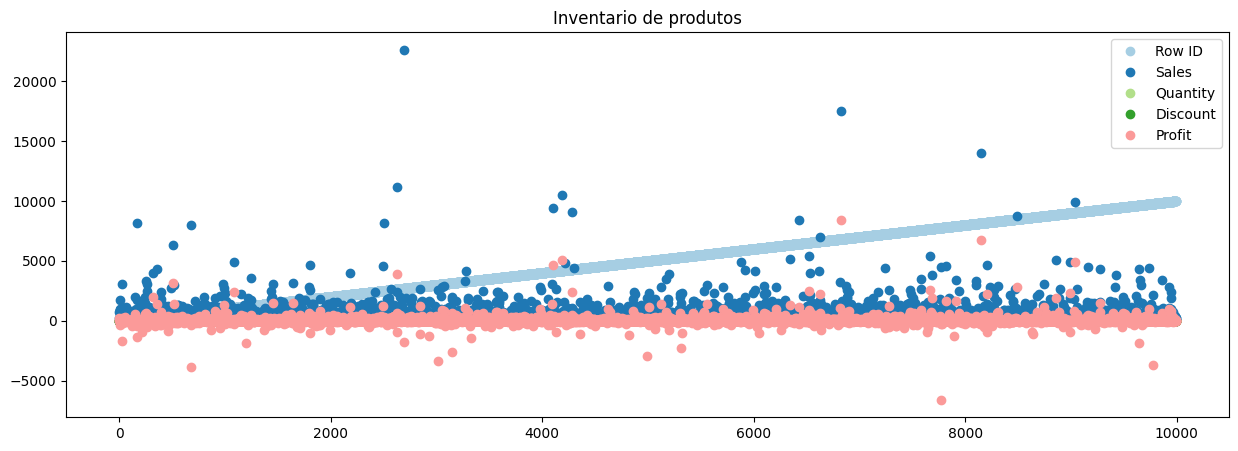

In [177]:
df.plot(style='o',
        figsize=(15, 5),
        color=color_pal,
        title='Inventario de produtos')

In [178]:
#acertando o formato das datas
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day


print('Menor data: ', df['Year'].min())
print('Maior data: ', df['Year'].max())

Menor data:  2014
Maior data:  2017


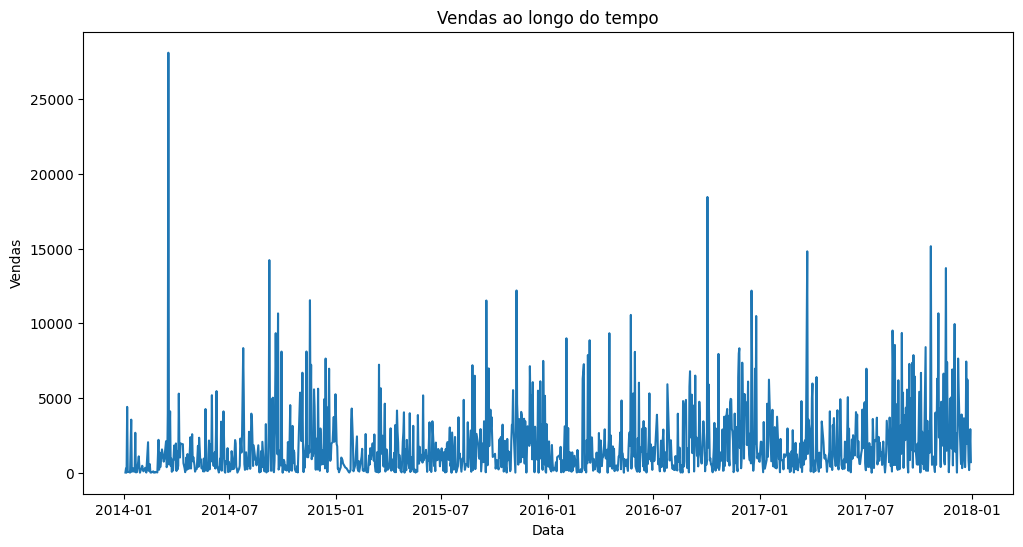

In [179]:
df_serie = df.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_serie['Order Date'], df_serie['Sales'])
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.show()


In [180]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order Date     9994 non-null   datetime64[ns]
 2   Customer Name  9994 non-null   object        
 3   Segment        9994 non-null   object        
 4   City           9994 non-null   object        
 5   Category       9994 non-null   object        
 6   Sub-Category   9994 non-null   object        
 7   Product Name   9994 non-null   object        
 8   Sales          9994 non-null   float64       
 9   Quantity       9994 non-null   int64         
 10  Discount       9994 non-null   float64       
 11  Profit         9994 non-null   float64       
 12  Year           9994 non-null   int32         
 13  Month          9994 non-null   int32         
 14  Day            9994 non-null   int32         
dtypes: datetime64[ns](1),

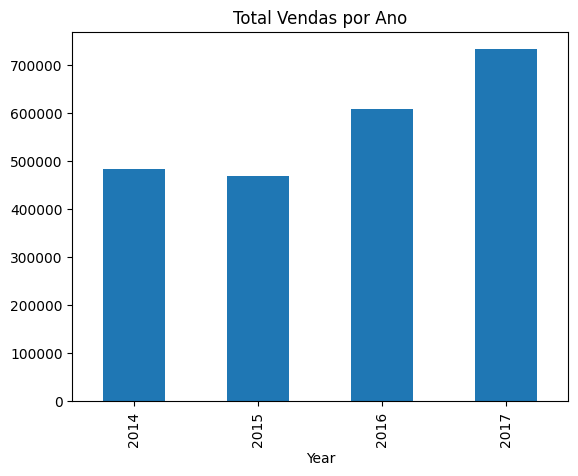

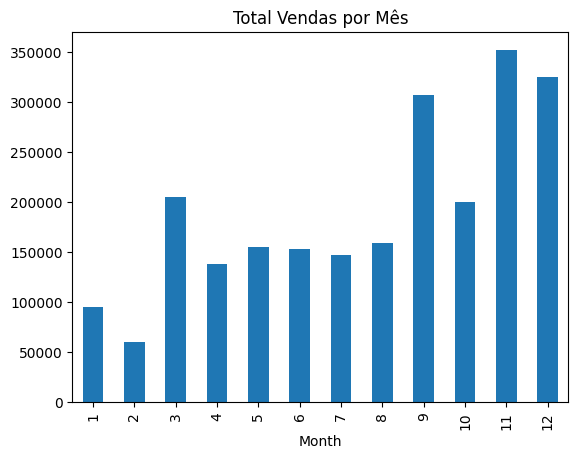

In [181]:
df.groupby('Year')['Sales'].sum().plot(kind='bar', title='Total Vendas por Ano')
plt.show()

df.groupby('Month')['Sales'].sum().plot(kind='bar', title='Total Vendas por Mês')
plt.show()


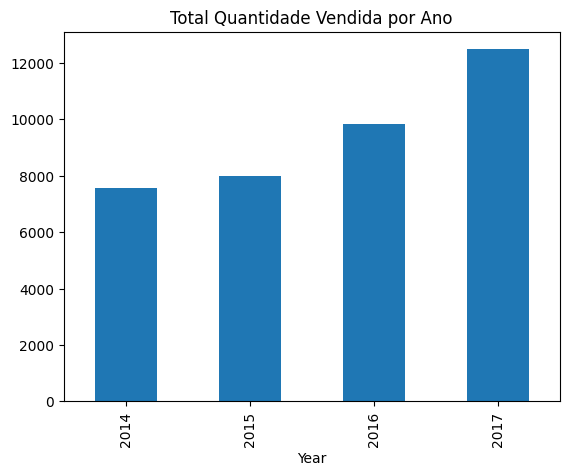

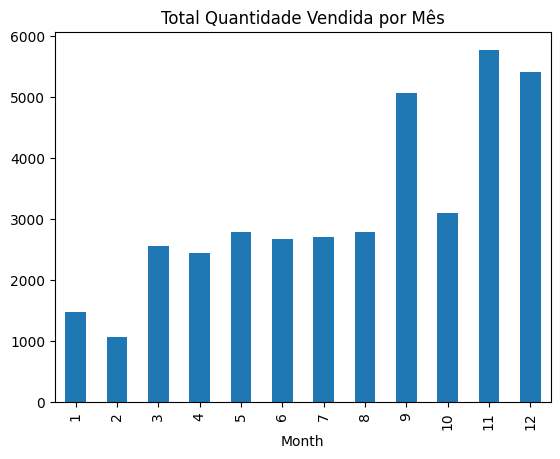

In [182]:
df.groupby('Year')['Quantity'].sum().plot(kind='bar', title='Total Quantidade Vendida por Ano')
plt.show()

df.groupby('Month')['Quantity'].sum().plot(kind='bar', title='Total Quantidade Vendida por Mês')
plt.show()


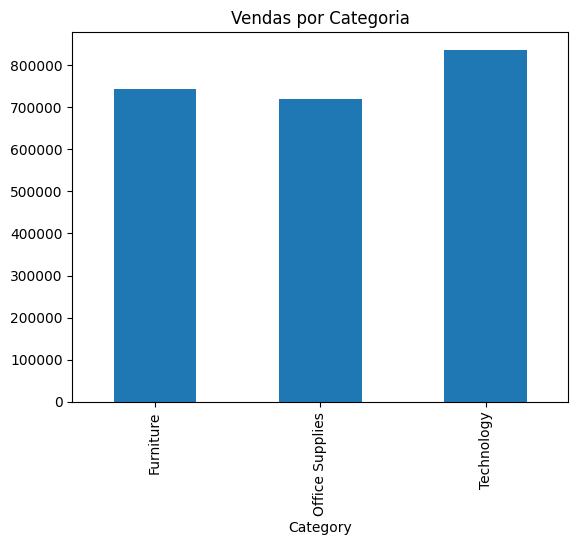

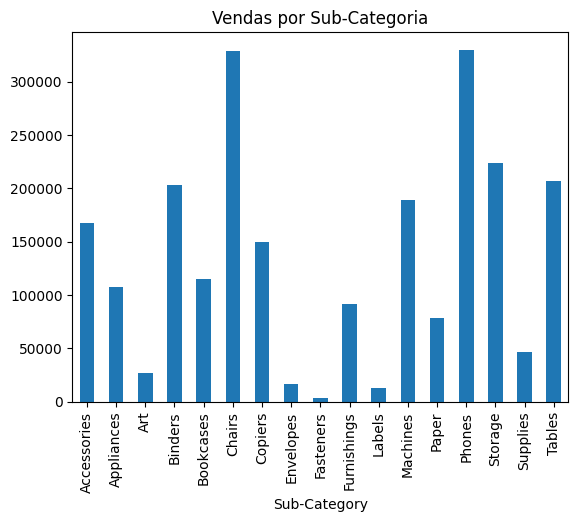

In [183]:
df.groupby('Category')['Sales'].sum().plot(kind='bar', title='Vendas por Categoria')
plt.show()

df.groupby('Sub-Category')['Sales'].sum().plot(kind='bar', title='Vendas por Sub-Categoria')
plt.show()


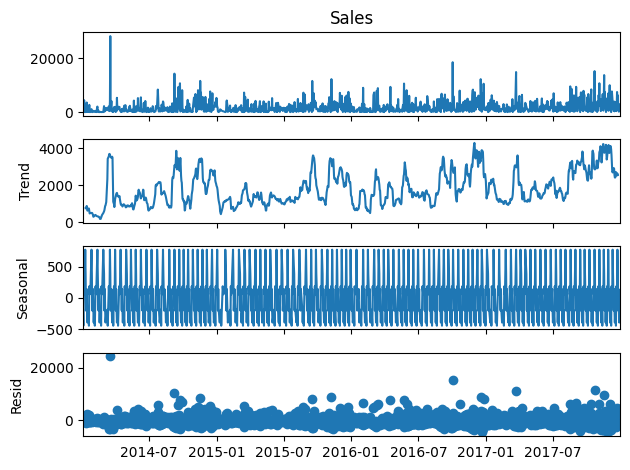

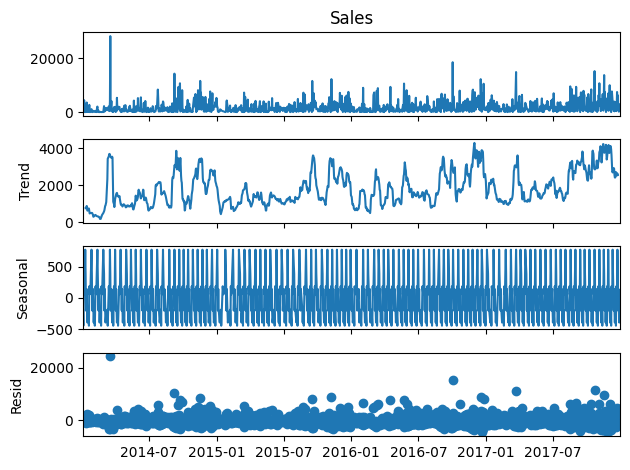

In [184]:
df_serie.set_index('Order Date', inplace=True)

decomposition = seasonal_decompose(df_serie['Sales'], model='additive', period=12)
decomposition.plot()


In [185]:
df_mes = pd.read_csv('dataset/superstore.csv', parse_dates=['Order Date'], index_col='Order Date')

df_monthly_sales = df_mes.resample('ME').sum()['Sales']

In [193]:
df_monthly_sales

Order Date
2014-01-31     14236.8950
2014-02-28      4519.8920
2014-03-31     55691.0090
2014-04-30     28295.3450
2014-05-31     23648.2870
2014-06-30     34595.1276
2014-07-31     33946.3930
2014-08-31     27909.4685
2014-09-30     81777.3508
2014-10-31     31453.3930
2014-11-30     78628.7167
2014-12-31     69545.6205
2015-01-31     18174.0756
2015-02-28     11951.4110
2015-03-31     38726.2520
2015-04-30     34195.2085
2015-05-31     30131.6865
2015-06-30     24797.2920
2015-07-31     28765.3250
2015-08-31     36898.3322
2015-09-30     64595.9180
2015-10-31     31404.9235
2015-11-30     75972.5635
2015-12-31     74919.5212
2016-01-31     18542.4910
2016-02-29     22978.8150
2016-03-31     51715.8750
2016-04-30     38750.0390
2016-05-31     56987.7280
2016-06-30     40344.5340
2016-07-31     39261.9630
2016-08-31     31115.3743
2016-09-30     73410.0249
2016-10-31     59687.7450
2016-11-30     79411.9658
2016-12-31     96999.0430
2017-01-31     43971.3740
2017-02-28     20301.1334
2

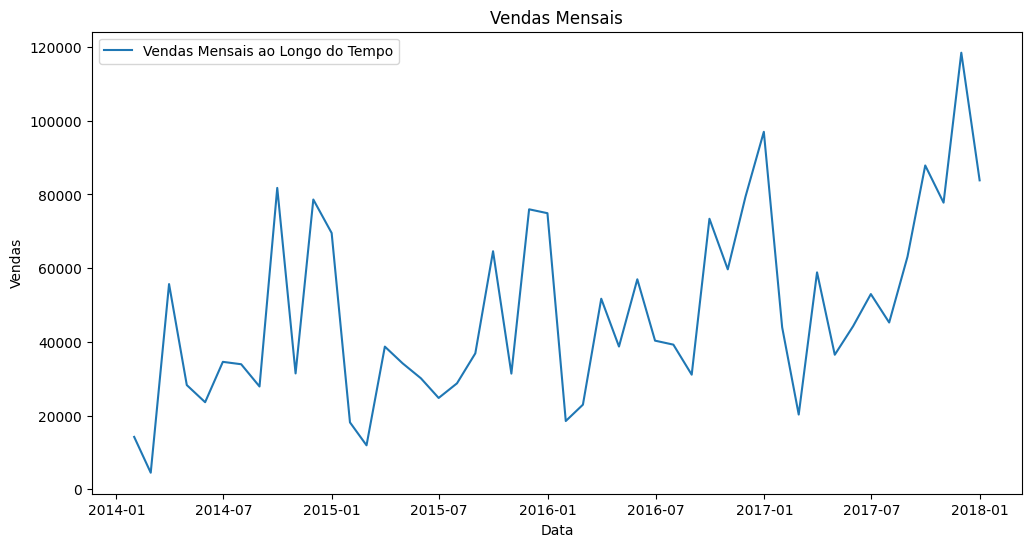

In [186]:
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_sales, label='Vendas Mensais ao Longo do Tempo')
plt.title('Vendas Mensais')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend()
plt.show()